In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
bike_rental = pd.read_csv('day.csv')

#read the data file to know the columns and their values
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check no of rows and columns in bike_rental data
bike_rental.shape

(730, 16)

In [4]:
# # check data type in data set
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check Numeric columns in application data
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Missing Values Check and Treatment

In [6]:
# check the null value in the dataset
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As per above data info, there is no missing values into the data set. We can move ahead and drop the unwanted columns

#### Drop the unwanted columns
Below columns can be dropped 

1. instant - each row has unique value and no significance with target variable.
2. dteday: Date is not relevant here and other columns are already capture the significance of date.
3. atemp/temp - temp and atemp are both representing the same and highly co-related so we will drop atemp.
4. casual/registered - cnt is sum of casual & registered variables so we can drop these too.

In [7]:
bike_rental = bike_rental.drop(['instant','dteday','atemp','casual','registered'], axis=1)

In [8]:
# check the dataset again

bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Numeric variables (season, yr, mnth, hoilday, workingday, weathersit) has binary or upto 4 values it means they can treated as categorical variable. We will check each columns one by one and change the numeric value with respective values from data dictionary.

#### season column

In [9]:
bike_rental.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In data dictionary it is mentioned that 1, 2, 3, and 4 belongs to 'Spring','Summer','Fall', and'Winter' so we will replace them in data set.

In [10]:
bike_rental.replace(to_replace= {'season': {1:'Spring', 2:'Summer', 3:'Fall',4:'Winter'}}, inplace=True)

In [11]:
bike_rental.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

Similarly we will replace the values in mnth, weekday and whethersit columns

In [12]:
bike_rental.replace(to_replace= {'mnth': {1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},
                                'weekday': {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'},
                                'weathersit':{1:'Clear + Cloudy',2:'Mist + Cloudy',3:'Light Snow + Light Rain',4:'Heavy Rain + Ice Pallets'}}, inplace=True)

Check the mnth, weekday and whethersit again

In [13]:
bike_rental.mnth.value_counts()

Aug    62
Oct    62
Mar    62
Jul    62
Dec    62
May    62
Jan    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [14]:
bike_rental.weekday.value_counts()

Sat     105
Mon     105
Sun     105
Thur    104
Fri     104
Tue     104
Wed     103
Name: weekday, dtype: int64

In [16]:
bike_rental.weathersit.value_counts()

Clear + Cloudy             463
Mist + Cloudy              246
Light Snow + Light Rain     21
Name: weathersit, dtype: int64

#### yr column / holiday/workingday 

All these columns have binary values so we will not change them

In [17]:
bike_rental.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [18]:
bike_rental.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [19]:
bike_rental.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [20]:
# check the dataset again

bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear + Cloudy,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear + Cloudy,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear + Cloudy,9.305237,43.6957,12.522300,1600


#### Check for the outliers

- Here in our analysis to find out the outliers, we have considered continuous columns and analyzed the statistics of them.

In [21]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
bike_rental.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
90%,1.000000,0.000000,1.000000,29.998347,81.762500,19.833997,7293.800000
95%,1.000000,0.000000,1.000000,31.520460,86.868735,22.999988,7576.400000
99%,1.000000,1.000000,1.000000,33.868050,92.795857,27.380948,8163.810000


From the distribution shown above, we can see that there are no outliers in the data. The numbers are gradually increasing.

### Univariate Analysis - Categorical

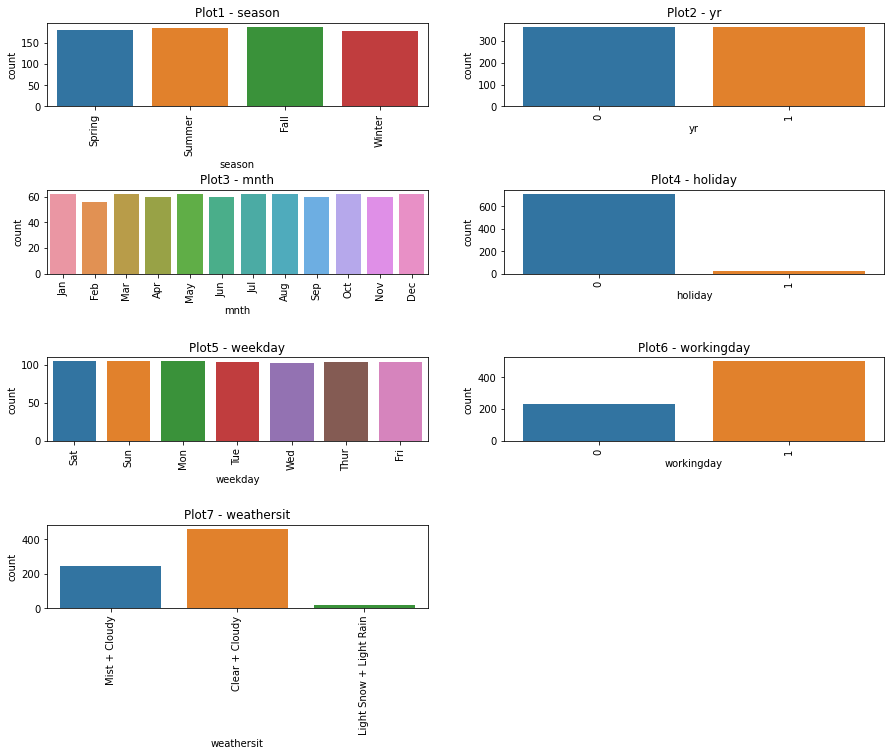

In [22]:
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (15,20))
for col in cat_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    sns.countplot(bike_rental[col])
    plt.title("Plot"+  str(subCnt)+ ' - ' + col )
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 1.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. Season
- Bikers like to go for cycling in all the seasons

###### 2. yr
- Both 2018 & 2019 have almost same bikers count

###### 3. Mnth
- Bikers like to go for cycling during all months

###### 4. Holiday
- Bikers prefer to go out on non holiday days more than holiday.

###### 5. Weekday
- Bikers like to go for cycling during all days of the week

###### 6. Working Day
- Bikers like to go for cycling on weekdays more than weekend or holidays

###### 7. Weathersit
- Bikers like to go for cycling in clear and cloudy wheather more.



### Univariate Analysis - Continuous

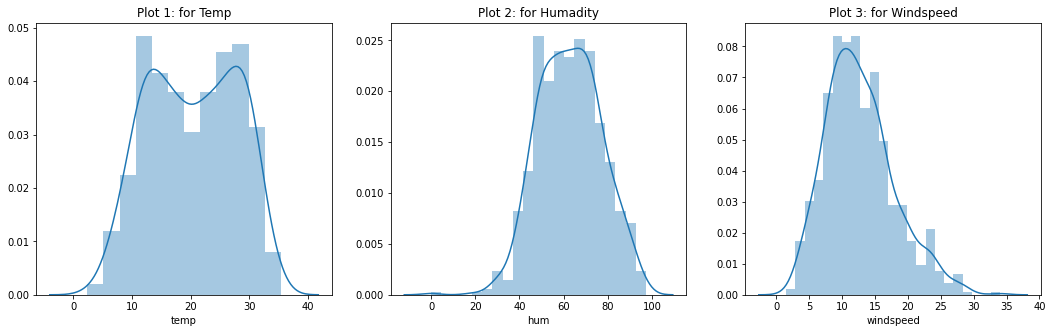

In [23]:
plt.figure(figsize = (18,5))

plt.subplot(1, 3, 1)
plt.title('Plot 1: for Temp' )
sns.distplot(bike_rental.temp)

plt.subplot(1, 3, 2)
plt.title('Plot 2: for Humadity' )
sns.distplot(bike_rental.hum)

plt.subplot(1, 3, 3)
plt.title('Plot 3: for Windspeed' )
sns.distplot(bike_rental.windspeed)

plt.show()


###### Insights of each plots draw above:

###### Plot 1 : Variation in temperature
- This shows biker prefer to go out in plesant whether so there is peak between 10 to 30 degree centigrate.

###### Plot 2 : Variation in Humadity
- This shows biker prefer to go out in less humid weather so there is peak between 45 to 70.

###### Plot 3 : Variation in Windspeed
- This shows biker prefer to go out in plesant whether so there is peak between 8 to 15.



### Bivariate Analysis: Categorical - Continuous

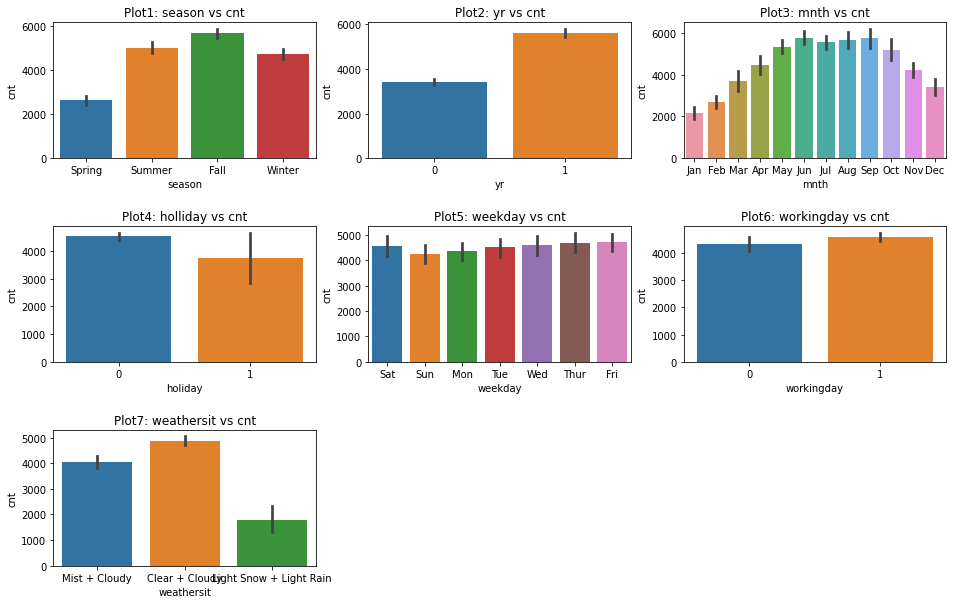

In [26]:
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.barplot(x='season',y='cnt', data=bike_rental)
plt.title('Plot1: season vs cnt')
plt.subplot(3,3,2)
sns.barplot(x='yr',y='cnt', data=bike_rental)
plt.title('Plot2: yr vs cnt')
plt.subplot(3,3,3)
sns.barplot(x='mnth',y='cnt', data=bike_rental)
plt.title('Plot3: mnth vs cnt')
plt.subplot(3,3,4)
sns.barplot(x='holiday',y='cnt', data=bike_rental)
plt.title('Plot4: holliday vs cnt')
plt.subplot(3,3,5)
sns.barplot(x='weekday',y='cnt', data=bike_rental)
plt.title('Plot5: weekday vs cnt')
plt.subplot(3,3,6)
sns.barplot(x='workingday',y='cnt', data=bike_rental)
plt.title('Plot6: workingday vs cnt')
plt.subplot(3,3,7)
sns.barplot(x='weathersit',y='cnt', data=bike_rental)
plt.title('Plot7: weathersit vs cnt')
plt.subplots_adjust(hspace = 0.5)
plt.show()

###### Insights of each plots draw above:

###### 1. season vs cnt

- Riders prefer fall seasons to go for riding and book least bike in spring season.

###### 2. yr vs cnt

- In 2019, bikers booked more than 2018.

###### 3. mnth vs cnt

- Bike booking increases from jan to jun then remain almost same till sep and then start decreasing till dec.
- June and sep has the highest count.

###### 4. holiday vs cnt

- non holiday days has more bike booking than holidays.

###### 5. weekday vs cnt

- Almost all days have same booking but sat has highest booking.

###### 6. workingday vs cnt

- both working and non working days have same booking

###### 7. weathersit vs cnt

- Riders prefer clear and cloudy weather than snowy and rainy whether


### Bivariate Analysis: Continuous - Continuous

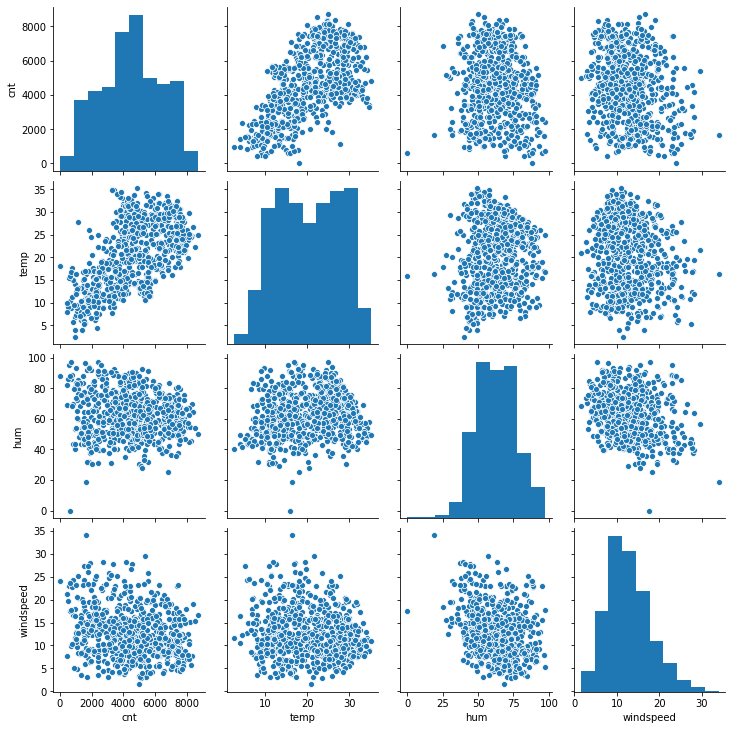

In [27]:
# visulize the numeric variable
sns.pairplot(bike_rental[['cnt','temp', 'hum', 'windspeed']])
plt.show()

###### Insights of each plots draw above:

###### 1. temp vs cnt

- it's clearly indicates there is positive co-relation between temp and cnt. As temp increases count inceases

###### 2. hum vs cnt

- hum and cnt has negative co-relation. Humadity increases count dicreases.


###### 3. windspeed vs cnt

- hum and cnt has negative co-relation. windspeed increases count dicreases.


### Correlation

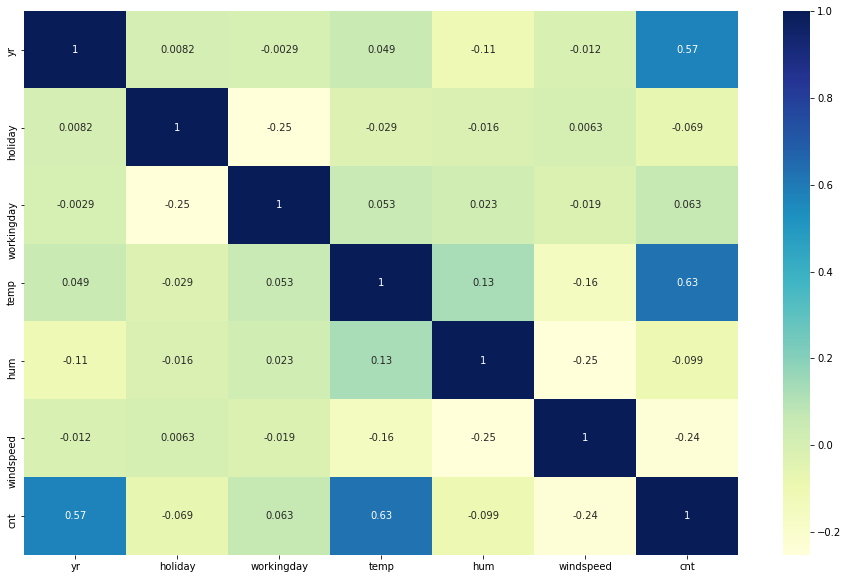

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(bike_rental.corr(), annot=True, cmap='YlGnBu')
plt.show()

###### Insights of co-relation plot:

- cnt has high positive co-relation with temp and negative co-relation with humadity and windspeed


## Step 3: Data Preparation

##### steps

- Encoding:
    - other categorical variable into dummy variable
- splitting into train and test
- Rescalling of variables

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [29]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(bike_rental[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)

# Adding the results to the master dataframe
bike_rental = pd.concat([bike_rental, dummy1], axis=1)

In [30]:
#check the dataset again
bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Mon,1,Clear + Cloudy,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear + Cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear + Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# check the shape of updated dataset
bike_rental.shape

(730, 33)

#### Dropping the repeated variables

We have created dummies for the below variables, so we can drop them

season / mnth / weekday /weathersit

In [32]:
bike_rental = bike_rental.drop(['season','mnth','weekday','weathersit'], 1)

In [33]:
# check the dataframe again
bike_rental.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## splitting into train and test dataset¶

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
df_train, df_test = train_test_split(bike_rental, train_size=0.7, random_state=100)

In [36]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [37]:
# check the train dataframe
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,17.647835,73.7391,19.348461,2077,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
# create a list of numerical variable
num_var = bike_rental.select_dtypes(include=['int','float']).columns

In [40]:
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [41]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-3.091209e-17,-1.570639e-16,-3.748635e-16,-2.746169e-16,-2.166023e-16,9.523972e-18,1.493359e-16,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,-1.015811e+00,-1.617311e-01,-1.445998e+00,-2.381884e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.015811e+00,-1.617311e-01,-1.445998e+00,-8.756866e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.844348e-01,-1.617311e-01,6.915641e-01,2.285273e-02,2.219277e-02,-1.421889e-01,2.291863e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.844348e-01,-1.617311e-01,6.915641e-01,8.765214e-01,7.161828e-01,5.515521e-01,7.636488e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.844348e-01,6.183104e+00,6.915641e-01,2.050027e+00,2.398847e+00,4.003357e+00,2.169933e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building
### Divide the data into X and y

In [42]:
# X_train, y_train

y_train = df_train.pop('cnt')
X_train=df_train

In [43]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
576,0.984435,-0.161731,0.691564,1.230870,0.515796,-0.331282,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0.984435,-0.161731,-1.445998,-0.421238,-0.070634,-0.386359,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.984435,-0.161731,-1.445998,-1.295618,-1.046051,2.017388,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0.984435,-0.161731,-1.445998,-0.628327,-1.001847,-0.780539,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,-1.015811,-0.161731,0.691564,-0.849222,0.695551,0.354275,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
y_train.head()

576    1.401236
426   -0.215182
728   -1.380030
482   -0.136157
111   -1.438016
Name: cnt, dtype: float64

#### Running First Training Model

In [45]:
import statsmodels.api as sm

#### Feature Selection Using RFE

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [48]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False,  True,
        True])

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 7),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 2),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 8),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 10),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow + Light Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sun', 'weathersit_Light Snow + Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'hum', 'windspeed', 'mnth_Aug', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Sat', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_traint dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          4.96e-179
Time:                        22:12:37   Log-Likelihood:                -271.75
No. Observations:                 510   AIC:                             575.5
Df Residuals:                     494   BIC:                             643.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

`season_Summer` has high p value(0.151) and insignificant in presence of other variables; can be dropped

In [56]:
X_train_new = X_train_rfe.drop(["season_Summer"], axis = 1)

#### Model 2
- Rebuilding the model without season_Summer

In [57]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   


In [58]:
#Let's see the summary of our linear model 2
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     171.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.04e-179
Time:                        22:13:23   Log-Likelihood:                -272.82
No. Observations:                 510   AIC:                             575.6
Df Residuals:                     495   BIC:                             639.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

`mnth_Feb` has high p(0.078) value and insignificant in presence of other variables; can be dropped

In [59]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

#### Model 3
- Rebuilding the model without season_Summer & mnth_feb

In [60]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [61]:
#Let's see the summary of our linear model 3
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.51e-180
Time:                        22:13:48   Log-Likelihood:                -274.42
No. Observations:                 510   AIC:                             576.8
Df Residuals:                     496   BIC:                             636.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Now alll variable has significant p vlaue so we can move to check the VIF for multicolinearity. 

In [62]:
X_train_lm.columns

Index(['const', 'yr', 'temp', 'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sun', 'weathersit_Light Snow + Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [63]:
X_train_new = X_train_lm.drop(['const'], axis=1)

#### VIF for model 3

In [64]:
# Calculate the VIFs for the new model 3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_Winter,2.51
1,temp,2.45
2,season_Spring,2.30
7,mnth_Nov,1.81
5,mnth_Jan,1.73
4,mnth_Dec,1.52
6,mnth_Jul,1.38
12,weathersit_Mist + Cloudy,1.34
8,mnth_Sep,1.16
9,weekday_Mon,1.15


Above model 3 has 82.8% r2 value and 82.4% adjusted r2 vlaue. Also have significant p values and have VIF less than 3 for all the variables. But variable mnth_Jan has p value 0.03. Let's drop this variable and see how model performance is changing.

In [65]:
X_train_new = X_train_new.drop(["mnth_Jan"], axis = 1)

#### Model 4
Rebuilding the model without season_Summer, mnth_feb & mnth_Jan

In [66]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [67]:
#Let's see the summary of our linear model 4
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.40e-180
Time:                        22:14:37   Log-Likelihood:                -276.78
No. Observations:                 510   AIC:                             579.6
Df Residuals:                     497   BIC:                             634.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [68]:
X_train_new = X_train_lm.drop(['const'], axis=1)

#### VIF for model 4

In [69]:
# Calculate the VIFs for the new model 4
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_Winter,2.51
1,temp,2.30
2,season_Spring,1.94
6,mnth_Nov,1.79
4,mnth_Dec,1.46
5,mnth_Jul,1.36
11,weathersit_Mist + Cloudy,1.33
7,mnth_Sep,1.16
8,weekday_Mon,1.15
9,weekday_Sun,1.15


Model 4 has now p value greater than 0.05 for mnth_dec variable and have VIF less than 3 for all variables. Let's drop mnth_Dec and check the model agian.

In [70]:
X_train_new = X_train_new.drop(["mnth_Dec"], axis = 1)

#### Model 5
Rebuilding the model without season_Summer, mnth_feb , mnth_Jan & mnth_dec

In [71]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [72]:
#Let's see the summary of our linear model 5
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.08e-180
Time:                        22:15:43   Log-Likelihood:                -278.74
No. Observations:                 510   AIC:                             581.5
Df Residuals:                     498   BIC:                             632.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [73]:
X_train_new = X_train_lm.drop(['const'], axis=1)

#### VIF for model 5

In [74]:
# Calculate the VIFs for the new model 5
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.24
3,season_Winter,1.97
2,season_Spring,1.94
5,mnth_Nov,1.56
4,mnth_Jul,1.35
10,weathersit_Mist + Cloudy,1.33
6,mnth_Sep,1.16
7,weekday_Mon,1.15
8,weekday_Sun,1.15
9,weathersit_Light Snow + Light Rain,1.06


Above model 5 has 82.5% r2 value and 82.1% adjusted r2 vlaue. Also have significant p values and have VIF less than 3 for all the variables. But variable mnth_Nov has p value 0.026. Let's drop this variable and see how model performance is changing.

In [75]:
X_train_new = X_train_new.drop(["mnth_Nov"], axis = 1)

#### Model 6
Rebuilding the model without season_Summer, mnth_feb , mnth_Jan, mnth_dec & mnth_Nov

In [76]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [77]:
#Let's see the summary of our linear model 5
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          8.20e-181
Time:                        22:16:17   Log-Likelihood:                -281.29
No. Observations:                 510   AIC:                             584.6
Df Residuals:                     499   BIC:                             631.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [78]:
X_train_new = X_train_lm.drop(['const'], axis=1)

#### VIF for Model 6

In [79]:
# Calculate the VIFs for the new model 6
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.23
2,season_Spring,1.93
3,season_Winter,1.44
4,mnth_Jul,1.35
9,weathersit_Mist + Cloudy,1.33
5,mnth_Sep,1.15
6,weekday_Mon,1.15
7,weekday_Sun,1.15
8,weathersit_Light Snow + Light Rain,1.06
0,yr,1.02


Above model 6 has 82.4% r2 value and 82.0% adjusted r2 vlaue. Also have significant p values and have VIF less than 3 for all the variables. But variable weekday_Mon has p value 0.023. Let's drop this variable and see how model performance is changing.

In [80]:
X_train_new = X_train_new.drop(["weekday_Mon"], axis = 1)

#### Model 7
Rebuilding the model without season_Summer, mnth_feb , mnth_Jan, mnth_dec , mnth_Nov & weekday_Mon

In [81]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [82]:
#Let's see the summary of our linear model 5
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          6.47e-181
Time:                        22:16:43   Log-Likelihood:                -283.92
No. Observations:                 510   AIC:                             587.8
Df Residuals:                     500   BIC:                             630.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:
X_train_new = X_train_lm.drop(['const'], axis=1)

#### VIF for model 7

In [84]:
# Calculate the VIFs for the new model 6
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.21
2,season_Spring,1.87
3,season_Winter,1.38
4,mnth_Jul,1.35
8,weathersit_Mist + Cloudy,1.31
5,mnth_Sep,1.15
6,weekday_Sun,1.13
7,weathersit_Light Snow + Light Rain,1.06
0,yr,1.02


Above model7 has r2 82.2% and adjusted r2 value is 81.9% and p value for all the variable is 0. VIF is also less than 3 for all the variables. Less VIF also indicates there is no multicolinearity in the independent variables.

##### So we can go ahead with this model and start doing residual analysis.

### Residual Analysis of the train data

In [85]:
y_train_pred = lm.predict(X_train_lm)

##### Calculate error term

In [86]:
res = y_train - y_train_pred

##### Check the Normality distribution of error term

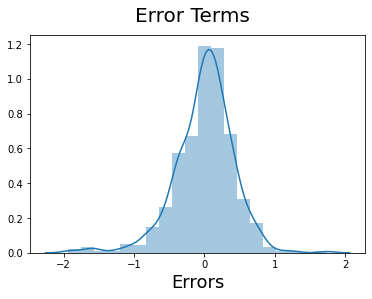

In [87]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    
plt.show()

##### mean of residuals or error term

In [88]:
np.mean(res)

4.0621101253932197e-16

Above plot is centered around zero and mean is almost zero so Error terms are normally distributed 

##### Check the homoscedasticity in error term

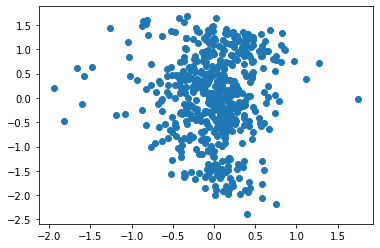

In [89]:
plt.scatter(res, y_train_pred)
plt.show()

Above graph clearly indicates there is no pattern and most of the values are centered around zero so there is no homoscedasticity or constant variance.

##### Auto correlation of residuals

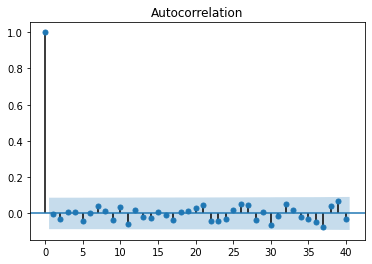

In [90]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(res, lags=40, alpha=0.05)
acf.show()

All auto correlation values are in significance limit and there is no auto correlation between residuals.

##### r2 Score on Train data set

In [92]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8217333159960296

### Making Prediction on Test set

#### Applying the scaling on the test sets

In [93]:
# create a list of numeric variable

num_var = df_test.select_dtypes(include=['int','float']).columns

In [94]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow + Light Rain,weathersit_Mist + Cloudy
184,-1.015811,6.183104,-1.445998,1.304506,0.047244,-1.395126,0.799313,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0.984435,-0.161731,0.691564,1.612837,-0.276917,-0.985373,0.885522,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,-1.015811,-0.161731,0.691564,-0.112907,1.284930,0.078536,-0.937183,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,-1.015811,-0.161731,0.691564,1.525401,-1.464502,0.110155,0.151206,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,-1.015811,-0.161731,0.691564,1.240076,-2.307309,1.276437,0.247678,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [95]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Now let's use our model to make predictions.

In [104]:
X_train_new.columns

Index(['yr', 'temp', 'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sun', 'weathersit_Light Snow + Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [105]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [106]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [101]:
y_pred.head()

184   -0.299156
535    1.529567
299   -0.441598
221    0.446763
152    0.312012
dtype: float64

##### Calculate the r2 Score on Test data set

In [107]:
# evaluate the model
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_pred)

0.8113861413387274

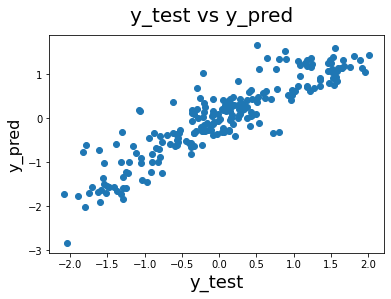

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.2553 + 0.5207  \times  yr + 0.4723  \times  temp - 0.5113 \times season_Spring + 0.2336 \times season_Winter - 0.2933 \times mnth_Jul + 0.2688 \times mnth_Sep - 0.1981 \times weekday_Sun - 1.3369 \times weathersit_Light Snow + Light Rain - 0.3483 \times weathersit_Mist + Cloudy $


With above equation it is clearly visible, weathersit_LightSnow + Light Rain, yr and temp are most significant variables.

- independent variable weathersit_LightSnow + Light Rain has coefficient as -1.3369 which means bikers avoid to go for riding in snowy or rainy weather or we can say, riders prefer to go for riding in clear and little cloudy weather.

- Year has coefficient 0.5207 which indecates bike demand in increasing as year passing and riders are booking more bikes year over year.

- Temp has coefficient 0.4723 which indicates bikers prefer to go for riding as temprature increases or bikers prefer pleasant weather with temprature between 15 to 30 degree celcius.